In [320]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns


In [363]:
df=pd.read_csv("TCS.csv")

In [364]:
df=df.fillna(0)

In [365]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [366]:
df["Date"]=df["Date"].astype('datetime64')

In [367]:
df.dtypes

Symbol                            object
Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
dtype: object

In [368]:
std=df["Close Price"].rolling(14).std().dropna()

In [369]:
ma=df["Close Price"].rolling(14).mean().dropna()

In [370]:
df["UPPER_BOLL"]=ma+2*(std)

In [371]:
df["LOWER_BOLL"]=ma-2*(std)

In [372]:
df["MIDDLE_BOLL"]=ma

In [373]:
df["Close Price"]=df["Close Price"].dropna()

In [374]:
df=df.dropna()

In [375]:
df=df.rename(columns={"Close Price":"CLOSE_PRICE"})

In [376]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,CLOSE_PRICE,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,UPPER_BOLL,LOWER_BOLL,MIDDLE_BOLL
13,TCS,EQ,2017-06-01,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2657.609185,2389.840815,2523.725000
14,TCS,EQ,2017-06-02,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2637.128396,2438.864462,2537.996429
15,TCS,EQ,2017-06-05,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2633.238603,2467.725683,2550.482143
16,TCS,EQ,2017-06-06,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2664.142666,2471.200192,2567.671429
17,TCS,EQ,2017-06-07,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2671.098920,2475.536794,2573.317857


In [273]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,CLOSE_PRICE,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,UPPER_BOLL,LOWER_BOLL,MIDDLE_BOLL,Call
13,TCS,EQ,2017-06-01,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2657.609185,2389.840815,2523.725000,
14,TCS,EQ,2017-06-02,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2637.128396,2438.864462,2537.996429,
15,TCS,EQ,2017-06-05,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2633.238603,2467.725683,2550.482143,
16,TCS,EQ,2017-06-06,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2664.142666,2471.200192,2567.671429,Short
17,TCS,EQ,2017-06-07,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2671.098920,2475.536794,2573.317857,


In [377]:
condition=[(df["LOWER_BOLL"]>df["CLOSE_PRICE"]),
          (df["CLOSE_PRICE"]>df["UPPER_BOLL"]),
          ((df["LOWER_BOLL"]<df["CLOSE_PRICE"])&((df["CLOSE_PRICE"])<(df["MIDDLE_BOLL"]))),
           ((df["MIDDLE_BOLL"]<df["CLOSE_PRICE"])&((df["CLOSE_PRICE"])<(df["UPPER_BOLL"])))]
choices=["Buy","Short","Hold Buy","Hold Short"]

In [378]:
df["Call"]=np.select(condition,choices)

In [379]:
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,CLOSE_PRICE,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,UPPER_BOLL,LOWER_BOLL,MIDDLE_BOLL,Call
13,TCS,EQ,2017-06-01,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2657.609185,2389.840815,2523.725000,Hold Short
14,TCS,EQ,2017-06-02,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2637.128396,2438.864462,2537.996429,Hold Short
15,TCS,EQ,2017-06-05,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2633.238603,2467.725683,2550.482143,Hold Short
16,TCS,EQ,2017-06-06,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2664.142666,2471.200192,2567.671429,Short
17,TCS,EQ,2017-06-07,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2671.098920,2475.536794,2573.317857,Hold Short
18,TCS,EQ,2017-06-08,2615.25,2598.00,2604.95,2515.50,2520.00,2521.60,2543.44,1665357,4.235731e+09,80468,678314,40.73,2669.388988,2479.311012,2574.350000,Hold Buy
19,TCS,EQ,2017-06-09,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,1574017,3.955950e+09,83931,599286,38.07,2671.838503,2473.382925,2572.610714,Hold Buy
20,TCS,EQ,2017-06-12,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,813253,2.022948e+09,44849,306655,37.71,2676.293021,2463.999836,2570.146429,Hold Buy
21,TCS,EQ,2017-06-13,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,587707,1.448635e+09,52410,268108,45.62,2686.166669,2438.754759,2562.460714,Hold Buy
22,TCS,EQ,2017-06-14,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,744571,1.838651e+09,42987,456486,61.31,2678.751509,2424.112777,2551.432143,Hold Buy


In [384]:
X=df[["UPPER_BOLL","LOWER_BOLL","MIDDLE_BOLL","CLOSE_PRICE"]]

In [385]:
y=df["Call"].astype(int)

13     4
14     4
15     4
16     2
17     4
      ..
493    3
494    3
495    3
496    3
497    3
Name: Call, Length: 485, dtype: int32

In [380]:
condition1=[df["Call"]=="Buy",df["Call"]=="Short",df["Call"]=="Hold Buy",df["Call"]=="Hold Short"]

In [381]:
choices1=["1","2","3","4"]#Encoding

In [382]:
df["Call"]=np.select(condition1,choices1)

In [383]:
df.head(50)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,CLOSE_PRICE,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,UPPER_BOLL,LOWER_BOLL,MIDDLE_BOLL,Call
13,TCS,EQ,2017-06-01,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2657.609185,2389.840815,2523.725000,4
14,TCS,EQ,2017-06-02,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2637.128396,2438.864462,2537.996429,4
15,TCS,EQ,2017-06-05,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2633.238603,2467.725683,2550.482143,4
16,TCS,EQ,2017-06-06,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2664.142666,2471.200192,2567.671429,2
17,TCS,EQ,2017-06-07,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2671.098920,2475.536794,2573.317857,4
18,TCS,EQ,2017-06-08,2615.25,2598.00,2604.95,2515.50,2520.00,2521.60,2543.44,1665357,4.235731e+09,80468,678314,40.73,2669.388988,2479.311012,2574.350000,3
19,TCS,EQ,2017-06-09,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,1574017,3.955950e+09,83931,599286,38.07,2671.838503,2473.382925,2572.610714,3
20,TCS,EQ,2017-06-12,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,813253,2.022948e+09,44849,306655,37.71,2676.293021,2463.999836,2570.146429,3
21,TCS,EQ,2017-06-13,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,587707,1.448635e+09,52410,268108,45.62,2686.166669,2438.754759,2562.460714,3
22,TCS,EQ,2017-06-14,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,744571,1.838651e+09,42987,456486,61.31,2678.751509,2424.112777,2551.432143,3


In [386]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (339, 4) (339,)
Test set: (146, 4) (146,)


In [939]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='linear', gamma=1.0,C=1)
svc.fit(X_train,y_train)
prediction = svc.predict(X_test)
accuracy_score(y_test,prediction)

1.0

We can see that it has a higher accuracy than the random forest classifier

In [396]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(X_test)
test_y = np.asanyarray(y_test)
test_y_hat = svc.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


In [940]:
prediction

array([4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4,
       3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 2, 3,
       4, 3, 4, 4, 3, 3, 4, 2, 3, 3, 4, 4, 4, 4, 3, 2, 4, 4, 4, 3, 4, 4,
       2, 2, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 3,
       4, 4, 3, 4, 2, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 3, 1, 4, 4, 1, 4, 4,
       4, 3, 4, 3, 4, 3, 4, 4, 1, 4, 3, 3, 4, 4])

In [398]:
from sklearn.ensemble import RandomForestClassifier
ranFor= RandomForestClassifier(n_estimators = 100)

In [400]:
ranFor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [402]:
pred=ranFor.predict(X_test)

In [937]:
accuracy_score(y_test,pred)

0.8082191780821918

## Selecting New stock for predicting their daily Calls

In [476]:
df1=pd.read_csv("MARUTI.csv")

In [477]:
df1["Date"]=df1["Date"].astype('datetime64')

In [478]:
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01
1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97
2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37
3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44
4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49


In [479]:
std=df1["Close Price"].rolling(14).std().dropna()

In [480]:
ma=df1["Close Price"].rolling(14).mean().dropna()

In [481]:
df1["UPPER_BOLL"]=ma+2*(std)

In [482]:
df1["LOWER_BOLL"]=ma-2*(std)

In [483]:
df1["MIDDLE_BOLL"]=ma

In [484]:
df1=df1.dropna()

In [485]:
df1=df1.rename(columns={"Close Price":"CLOSE_PRICE"})

In [486]:
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,CLOSE_PRICE,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,UPPER_BOLL,LOWER_BOLL,MIDDLE_BOLL
13,MARUTI,EQ,2017-06-01,7211.0,7242.0,7245.0,7110.10,7150.00,7146.6,7165.03,649217,4.651661e+09,74481,276770,42.63,7278.012455,6650.258974,6964.135714
14,MARUTI,EQ,2017-06-02,7146.6,7182.0,7187.7,7100.00,7110.60,7114.7,7135.00,310268,2.213762e+09,33719,153510,49.48,7297.291863,6672.522422,6984.907143
15,MARUTI,EQ,2017-06-05,7114.7,7139.8,7161.9,7091.10,7116.05,7125.7,7126.86,296147,2.110599e+09,31551,137016,46.27,7317.706277,6676.643723,6997.175000
16,MARUTI,EQ,2017-06-06,7125.7,7134.0,7154.3,7085.05,7118.95,7112.1,7110.16,324579,2.307810e+09,45217,197591,60.88,7333.461986,6682.873728,7008.167857
17,MARUTI,EQ,2017-06-07,7112.1,7135.0,7225.0,7107.60,7198.00,7205.7,7189.75,518152,3.725381e+09,44672,192737,37.20,7359.096234,6710.760909,7034.928571


In [487]:
condition2=[(df1["LOWER_BOLL"]>df1["CLOSE_PRICE"]),
          (df1["CLOSE_PRICE"]>df1["UPPER_BOLL"]),
          ((df1["LOWER_BOLL"]<df1["CLOSE_PRICE"])&((df1["CLOSE_PRICE"])<(df1["MIDDLE_BOLL"]))),
           ((df1["MIDDLE_BOLL"]<df1["CLOSE_PRICE"])&((df1["CLOSE_PRICE"])<(df1["UPPER_BOLL"])))]
choices2=["Buy","Short","Hold Buy","Hold Short"]

In [488]:
df1["Call"]=np.select(condition2,choices2)

In [489]:
df1.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,CLOSE_PRICE,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,UPPER_BOLL,LOWER_BOLL,MIDDLE_BOLL,Call
13,MARUTI,EQ,2017-06-01,7211.00,7242.0,7245.00,7110.10,7150.00,7146.60,7165.03,649217,4.651661e+09,74481,276770,42.63,7278.012455,6650.258974,6964.135714,Hold Short
14,MARUTI,EQ,2017-06-02,7146.60,7182.0,7187.70,7100.00,7110.60,7114.70,7135.00,310268,2.213762e+09,33719,153510,49.48,7297.291863,6672.522422,6984.907143,Hold Short
15,MARUTI,EQ,2017-06-05,7114.70,7139.8,7161.90,7091.10,7116.05,7125.70,7126.86,296147,2.110599e+09,31551,137016,46.27,7317.706277,6676.643723,6997.175000,Hold Short
16,MARUTI,EQ,2017-06-06,7125.70,7134.0,7154.30,7085.05,7118.95,7112.10,7110.16,324579,2.307810e+09,45217,197591,60.88,7333.461986,6682.873728,7008.167857,Hold Short
17,MARUTI,EQ,2017-06-07,7112.10,7135.0,7225.00,7107.60,7198.00,7205.70,7189.75,518152,3.725381e+09,44672,192737,37.20,7359.096234,6710.760909,7034.928571,Hold Short
18,MARUTI,EQ,2017-06-08,7205.70,7199.0,7274.95,7198.00,7260.00,7249.50,7231.51,426525,3.084420e+09,56722,229606,53.83,7377.946275,6757.475153,7067.710714,Hold Short
19,MARUTI,EQ,2017-06-09,7249.50,7271.0,7480.90,7230.00,7474.90,7464.85,7384.15,1122640,8.289742e+09,91222,395926,35.27,7423.478157,6820.964700,7122.221429,Short
20,MARUTI,EQ,2017-06-12,7464.85,7445.0,7450.00,7355.50,7375.00,7373.65,7395.21,454342,3.359955e+09,45067,192329,42.33,7451.845565,6863.283006,7157.564286,Hold Short
21,MARUTI,EQ,2017-06-13,7373.65,7394.6,7455.00,7335.00,7342.00,7348.95,7394.22,607567,4.492481e+09,58498,256546,42.23,7451.254730,6932.345270,7191.800000,Hold Short
22,MARUTI,EQ,2017-06-14,7348.95,7343.0,7392.45,7331.85,7352.00,7351.05,7359.55,277472,2.042070e+09,36585,116310,41.92,7461.035188,6974.757670,7217.896429,Hold Short


In [491]:
condition3=[df1["Call"]=="Buy",df1["Call"]=="Short",df1["Call"]=="Hold Buy",df1["Call"]=="Hold Short"]

In [492]:
choices3=["1","2","3","4"]

In [493]:
df1["Call"]=np.select(condition3,choices3)

In [494]:
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,CLOSE_PRICE,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,UPPER_BOLL,LOWER_BOLL,MIDDLE_BOLL,Call
13,MARUTI,EQ,2017-06-01,7211.0,7242.0,7245.0,7110.10,7150.00,7146.6,7165.03,649217,4.651661e+09,74481,276770,42.63,7278.012455,6650.258974,6964.135714,4
14,MARUTI,EQ,2017-06-02,7146.6,7182.0,7187.7,7100.00,7110.60,7114.7,7135.00,310268,2.213762e+09,33719,153510,49.48,7297.291863,6672.522422,6984.907143,4
15,MARUTI,EQ,2017-06-05,7114.7,7139.8,7161.9,7091.10,7116.05,7125.7,7126.86,296147,2.110599e+09,31551,137016,46.27,7317.706277,6676.643723,6997.175000,4
16,MARUTI,EQ,2017-06-06,7125.7,7134.0,7154.3,7085.05,7118.95,7112.1,7110.16,324579,2.307810e+09,45217,197591,60.88,7333.461986,6682.873728,7008.167857,4
17,MARUTI,EQ,2017-06-07,7112.1,7135.0,7225.0,7107.60,7198.00,7205.7,7189.75,518152,3.725381e+09,44672,192737,37.20,7359.096234,6710.760909,7034.928571,4


In [495]:
X1=df1[["UPPER_BOLL","LOWER_BOLL","MIDDLE_BOLL","CLOSE_PRICE"]]
y1=df1["Call"].astype(int)

In [496]:
predictionNew = svc.predict(X1)

In [503]:
accuracy_score(y1,predictionNew)

0.9668737060041408

In [516]:
pp=pd.DataFrame(pp)

In [521]:
pp.columns=["Call"]

In [522]:
pp

,Call
0,4
1,4
2,4
3,4
4,4
5,4
6,2
7,4
8,4
9,4


In [502]:
pp=predictionNew

In [523]:
condition4=[pp["Call"]=="1",df1["Call"]=="2",df1["Call"]=="3",df1["Call"]=="4"]

C:\Users\TUSHAR\.conda\envs\myenv\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [524]:
choices4=["Buy","Short","Hold Buy","Hold Short"]

In [525]:
pp["Call"]=np.select(condition4,choices4)

In [845]:
pp.head(15)#Prediction Calls for New Stock using just Bollinger columns and Close price column

,Call
0,Hold Short
1,Hold Short
2,Hold Short
3,Hold Short
4,Hold Short
5,Hold Short
6,Short
7,Hold Short
8,Hold Short
9,Hold Short


## 4.2

In [846]:
data=pd.read_csv("RELIANCE.csv")



In [847]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32


In [848]:
data["Date"]=data["Date"].astype('datetime64')

In [849]:
data.dropna()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32
5,RELIANCE,EQ,2017-05-22,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87
6,RELIANCE,EQ,2017-05-23,1324.15,1325.70,1329.85,1302.00,1304.55,1305.55,1313.55,2108223,2.769247e+09,81667,1172410,55.61
7,RELIANCE,EQ,2017-05-24,1305.55,1307.50,1313.70,1295.10,1299.00,1297.70,1302.71,3274804,4.266122e+09,78535,1782580,54.43
8,RELIANCE,EQ,2017-05-25,1297.70,1300.00,1312.40,1296.45,1301.50,1302.45,1303.19,5925335,7.721843e+09,114553,4678965,78.97
9,RELIANCE,EQ,2017-05-26,1302.45,1303.95,1344.40,1300.00,1339.00,1337.30,1320.18,4898639,6.467103e+09,111248,2843822,58.05


In [850]:
data["Open_Close%"]=(data["Open Price"]-data["Close Price"]).pct_change()

In [851]:
data["Low_High%"]=(data["Low Price"]-data["High Price"]).pct_change()

In [852]:
data["CLOSE_PRICE"]=data["Close Price"].rolling(5).mean().pct_change()

In [853]:
data["CLOSE_PRICESTD"]=data["Close Price"].rolling(5).std().pct_change()

In [854]:
data=data.dropna()

In [855]:
data=data.rename(columns={"Close Price":"Close_PricE"})

In [856]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close_PricE,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Open_Close%,Low_High%,CLOSE_PRICE,CLOSE_PRICESTD
5,RELIANCE,EQ,2017-05-22,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87,-0.833922,-0.284047,-0.002978,0.069390
6,RELIANCE,EQ,2017-05-23,1324.15,1325.70,1329.85,1302.00,1304.55,1305.55,1313.55,2108223,2.769247e+09,81667,1172410,55.61,7.574468,0.513587,-0.007598,-0.002093
7,RELIANCE,EQ,2017-05-24,1305.55,1307.50,1313.70,1295.10,1299.00,1297.70,1302.71,3274804,4.266122e+09,78535,1782580,54.43,-0.513648,-0.332136,-0.008357,-0.272777
8,RELIANCE,EQ,2017-05-25,1297.70,1300.00,1312.40,1296.45,1301.50,1302.45,1303.19,5925335,7.721843e+09,114553,4678965,78.97,-1.250000,-0.142473,-0.003788,-0.110055
9,RELIANCE,EQ,2017-05-26,1302.45,1303.95,1344.40,1300.00,1339.00,1337.30,1320.18,4898639,6.467103e+09,111248,2843822,58.05,12.612245,1.783699,0.002817,0.483851


In [857]:
data["Close_PricE"]=data["Close_PricE"].pct_change()

In [861]:
data=data.dropna()

In [862]:
data=data.replace([np.inf, -np.inf], np.nan)#to replace the infinite terms

In [863]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close_PricE,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Open_Close%,Low_High%,CLOSE_PRICE,CLOSE_PRICESTD
6,RELIANCE,EQ,2017-05-23,1324.15,1325.70,1329.85,1302.00,1304.55,-0.014047,1313.55,2108223,2.769247e+09,81667,1172410,55.61,7.574468,0.513587,-0.007598,-0.002093
7,RELIANCE,EQ,2017-05-24,1305.55,1307.50,1313.70,1295.10,1299.00,-0.006013,1302.71,3274804,4.266122e+09,78535,1782580,54.43,-0.513648,-0.332136,-0.008357,-0.272777
8,RELIANCE,EQ,2017-05-25,1297.70,1300.00,1312.40,1296.45,1301.50,0.003660,1303.19,5925335,7.721843e+09,114553,4678965,78.97,-1.250000,-0.142473,-0.003788,-0.110055
9,RELIANCE,EQ,2017-05-26,1302.45,1303.95,1344.40,1300.00,1339.00,0.026757,1320.18,4898639,6.467103e+09,111248,2843822,58.05,12.612245,1.783699,0.002817,0.483851
10,RELIANCE,EQ,2017-05-29,1337.30,1337.00,1365.45,1335.60,1355.25,0.014656,1352.77,5491170,7.428268e+09,88604,2590759,47.18,-0.403298,-0.327703,0.004987,0.549053


In [864]:
conditionss=[data["Close_PricE"]>0,data["Close_PricE"]<0]
choicess=["1","-1"]

In [865]:
data["Action"]=np.select(conditionss,choicess)#Changing according to given conditions

In [866]:
data=data.dropna()

In [867]:
data.dtypes

Symbol                            object
Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close_PricE                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
Open_Close%                      float64
Low_High%                        float64
CLOSE_PRICE                      float64
CLOSE_PRICESTD                   float64
Action                            object
dtype: object

In [868]:
X3=data[["Open_Close%","Low_High%","CLOSE_PRICE","CLOSE_PRICESTD"]]
y3=data["Action"].astype(int)

In [869]:
y3.dtype

dtype('int32')

In [871]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split( X3, y3, test_size=0.3, random_state=4)
print ('Train set:', X_train3.shape,  y_train3.shape)
print ('Test set:', X_test3.shape,  y_test3.shape)

Train set: (341, 4) (341,)
Test set: (147, 4) (147,)


In [925]:
from sklearn.ensemble import RandomForestClassifier
ranFor= RandomForestClassifier(n_estimators = 200)

In [926]:
ranFor.fit(X_train3,y_train3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [927]:
Preed=ranFor.predict(X_test3)

In [928]:
accuracy_score(y_test3,Preed)

0.7346938775510204

In [929]:
Preed

array([-1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1])

In [931]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close_PricE,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Open_Close%,Low_High%,CLOSE_PRICE,CLOSE_PRICESTD,Action
6,RELIANCE,EQ,2017-05-23,1324.15,1325.70,1329.85,1302.00,1304.55,-0.014047,1313.55,2108223,2.769247e+09,81667,1172410,55.61,7.574468,0.513587,-0.007598,-0.002093,-1
7,RELIANCE,EQ,2017-05-24,1305.55,1307.50,1313.70,1295.10,1299.00,-0.006013,1302.71,3274804,4.266122e+09,78535,1782580,54.43,-0.513648,-0.332136,-0.008357,-0.272777,-1
8,RELIANCE,EQ,2017-05-25,1297.70,1300.00,1312.40,1296.45,1301.50,0.003660,1303.19,5925335,7.721843e+09,114553,4678965,78.97,-1.250000,-0.142473,-0.003788,-0.110055,1
9,RELIANCE,EQ,2017-05-26,1302.45,1303.95,1344.40,1300.00,1339.00,0.026757,1320.18,4898639,6.467103e+09,111248,2843822,58.05,12.612245,1.783699,0.002817,0.483851,1
10,RELIANCE,EQ,2017-05-29,1337.30,1337.00,1365.45,1335.60,1355.25,0.014656,1352.77,5491170,7.428268e+09,88604,2590759,47.18,-0.403298,-0.327703,0.004987,0.549053,1


In [932]:

daily_CR=(1+data["Close_PricE"]).cumprod()

In [933]:
daily_CR

6      0.985953
7      0.980025
8      0.983612
9      1.009931
10     1.024733
         ...   
490    1.040097
491    1.005994
492    0.972705
493    0.968602
494    0.953815
Name: Close_PricE, Length: 488, dtype: float64

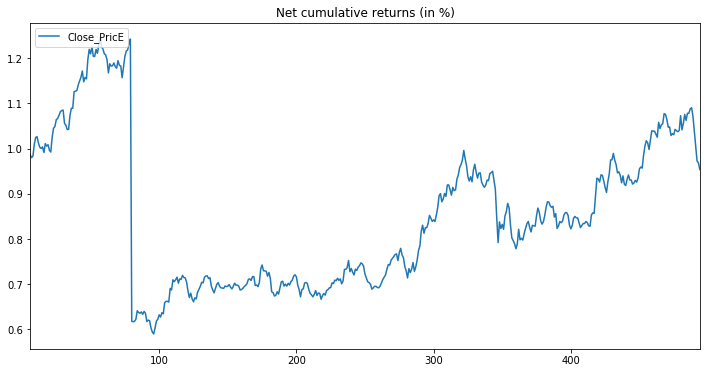

In [941]:
daily_CR.plot(figsize=(12,6))
plt.title("Net cumulative returns (in %)")
plt.legend(loc=2)